# **Pet classification using CNN**

**Dataset**

We have dataset containing images of "cats" and "dogs"
* Train set contains 20 images of each cat and dog
* Test set contains 10 images of each cat and dog

## Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## import tensorflow and required classes

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #loading images with required specifications (rotation, zoom etc)
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, Input
from tensorflow.keras.preprocessing import image

## Import Data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, #images containing RGB coef. between 0-255, we will convert them between 0-1 for easier learning
                                   shear_range=0.2, # RAndomly apply shearing
                                   zoom_range=0.2, #random zoom inside pictures
                                   horizontal_flip=True
                                   )

In [ ]:
train_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/CAT_DOG_images/train",
                                              target_size=(128,128),
                                              class_mode='binary',
                                              batch_size=32)

Found 40 images belonging to 2 classes.


In [ ]:
train_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/CAT_DOG_images/test",
                                              target_size=(128,128),
                                              class_mode='binary',
                                              batch_size=32)

Found 20 images belonging to 2 classes.


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

## Neural Network

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 activation='relu', 
                 padding='same',
                 input_shape=[128, 128, 3]))

model2.add(MaxPool2D(pool_size = 2))

model2.add(Conv2D(filters=64,
                 kernel_size = 3,
                 activation = 'relu'
                 ))

model2.add(MaxPool2D(pool_size = 2))

model2.add(Flatten())

model2.add(Dense(units=128, activation = 'relu'))
model2.add(Dense(units=64, activation = 'relu'))
model2.add(Dropout(0.4))

model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
model2.fit(train_set, validation_data=test_set, epochs=100)

Epoch 1/100
2/2 [==============================] - 11s 9s/step - loss: 0.6062 - accuracy: 0.6000 - val_loss: 3.8370 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 442ms/step - loss: 4.4476 - accuracy: 0.3750 - val_loss: 1.1951 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 1s/step - loss: 1.2676 - accuracy: 0.5750 - val_loss: 0.9430 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 460ms/step - loss: 0.8087 - accuracy: 0.6250 - val_loss: 0.7034 - val_accuracy: 0.4500
Epoch 5/100
2/2 [==============================] - 1s 1s/step - loss: 0.6779 - accuracy: 0.6750 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 1s 1s/step - loss: 0.7927 - accuracy: 0.5250 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 1s 1s/step - loss: 0.6952 - accuracy: 0.5500 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==========

In [ ]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
def catordog(image_dir):
  test_image= image.load_img(image_dir, target_size=(128,128,3))
  plt.imshow(test_image)
  testimg_array = image.img_to_array(test_image)
  testimg_array = np.expand_dims(testimg_array, axis=0)
  testimg_array = testimg_array/255

  result = model2.predict(testimg_array)
  if np.round(result[0][0])== 1:
    prediction="Its a Dog"
  else:
    prediction = "Its a Cat"
  print(prediction)

Its a Cat


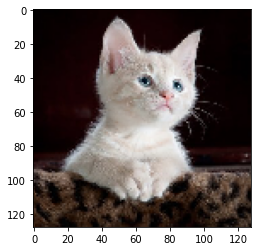

In [ ]:
catordog("/content/drive/MyDrive/Colab Notebooks/CAT_DOG_images/new_images/cat_or_dog_5.jpg")

Its a Cat


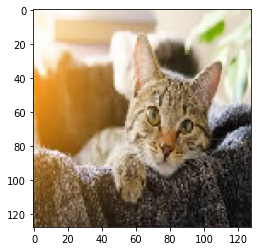

In [ ]:
catordog("/content/drive/MyDrive/Colab Notebooks/CAT_DOG_images/new_images/cat_or_dog_6.jpg")

Its a Dog


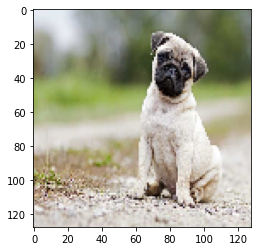

In [ ]:
catordog("/content/drive/MyDrive/Colab Notebooks/CAT_DOG_images/new_images/cat_or_dog_7.jpg")

Its a Dog


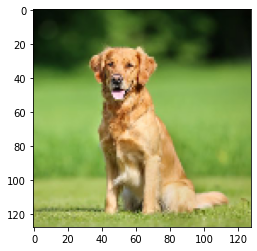

In [ ]:
catordog("/content/drive/MyDrive/Colab Notebooks/CAT_DOG_images/new_images/cat_or_dog_8.jpg")